In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

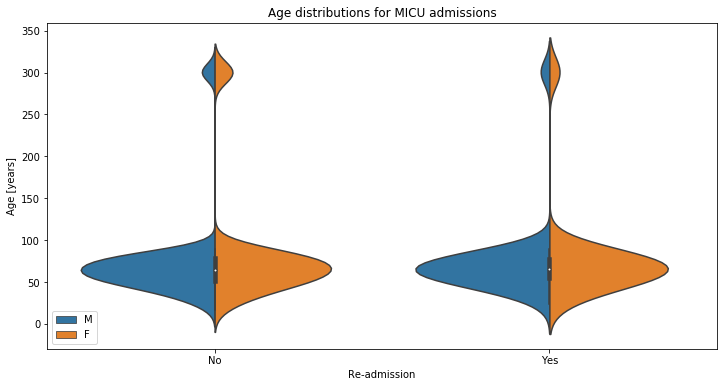

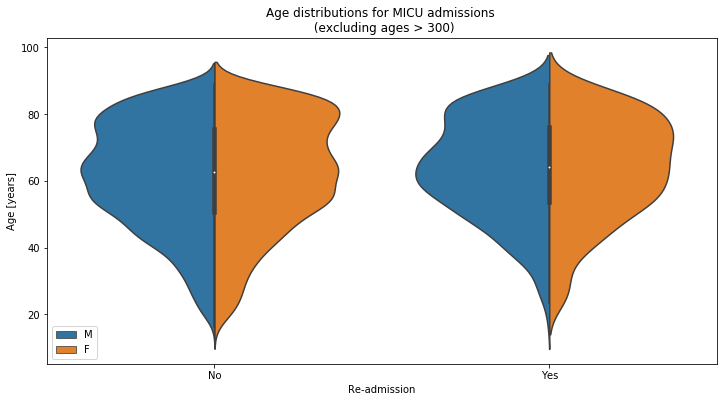

In [2]:
save_figs = False
MICU_admits_clean = pd.read_csv('MICU_admits_clean.csv')
fig = plt.figure(figsize=(12,6))

ax = sns.violinplot(x="future_readmit", hue="gender", y="age",data=MICU_admits_clean, split=True)
plt.legend(loc='lower left')
plt.xlabel('Re-admission')
plt.ylabel('Age [years]')
plt.title('Age distributions for MICU admissions')
if save_figs:
    fig.savefig('figures/Age_distribution_all.png')

fig = plt.figure(figsize=(12,6))
ax = sns.violinplot(x="future_readmit", hue="gender", y="age",data=MICU_admits_clean[MICU_admits_clean.age<300], split=True)
plt.legend(loc='lower left')
plt.xlabel('Re-admission')
plt.ylabel('Age [years]')
plt.title('Age distributions for MICU admissions \n (excluding ages > 300)')
if save_figs:
    fig.savefig('figures/Age_distribution_under300.png')

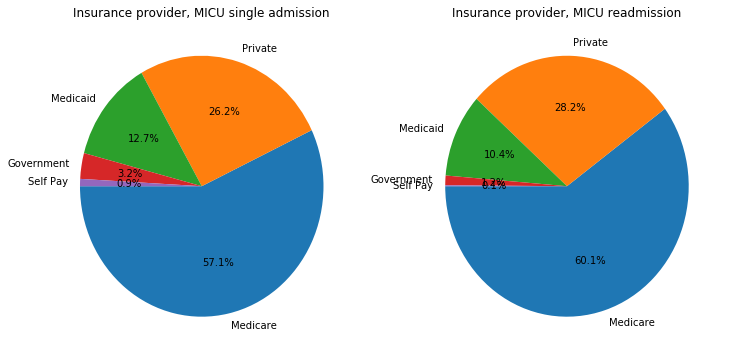

In [3]:
MICU_single_admit = MICU_admits_clean.loc[MICU_admits_clean.future_readmit == 'No']
MICU_readmit = MICU_admits_clean.loc[MICU_admits_clean.future_readmit == 'Yes']

fig = plt.figure(figsize=(12,6))

plt.subplot(121)
MICU_single_admit.insurance.value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle = 180
    
)
plt.title('Insurance provider, MICU single admission')
plt.ylabel('')

plt.subplot(122)
MICU_readmit.insurance.value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle = 180
)
plt.title('Insurance provider, MICU readmission')
plt.ylabel('')

if save_figs:
    fig.savefig('figures/insurance.png')

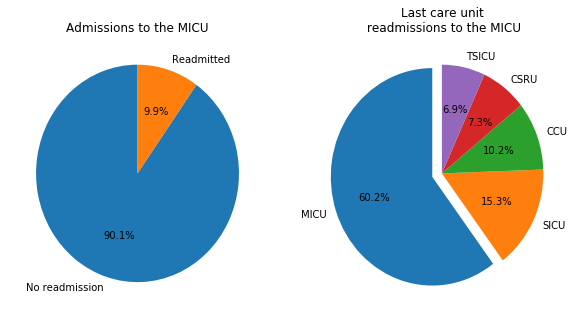

In [4]:
fig = plt.figure(figsize = (10, 5))
plt.subplot(121)
MICU_admits_clean.future_readmit.value_counts().plot.pie(
    labels = ['No readmission', 'Readmitted'],
    startangle = 90,
    autopct='%1.1f%%'
)
plt.ylabel('')
plt.title('Admissions to the MICU')

plt.subplot(122)
MICU_admits_clean.readmit_last_careunit.value_counts().plot.pie(
    labels = MICU_admits_clean.readmit_last_careunit.value_counts().keys(),
    startangle = 90,
    autopct='%1.1f%%',
    explode = (0.1, 0, 0, 0, 0)
)
plt.title('Last care unit\n readmissions to the MICU')
plt.ylabel('')

if save_figs:
    fig.savefig('figures/MICU_readmit.png')

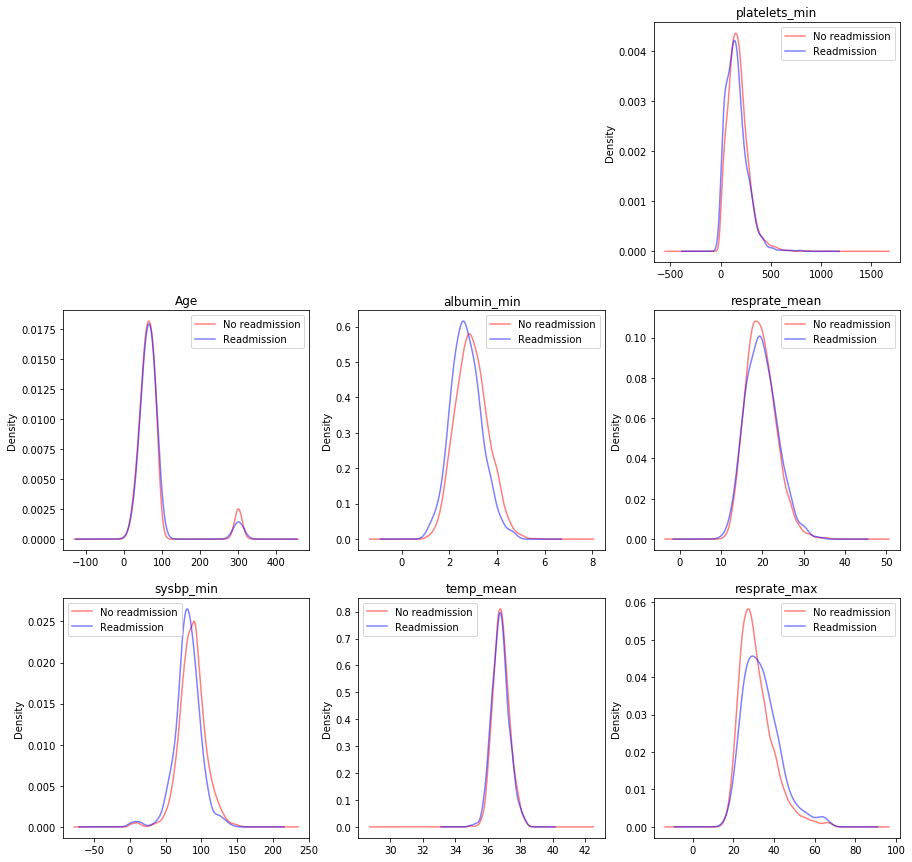

In [6]:
data_neg = MICU_single_admit 
data_pos = MICU_readmit
fig = plt.figure(figsize=(15,15))

plt.subplot(333)
data_neg.platelets_min.plot.kde(color = 'red', alpha = 0.5)
data_pos.platelets_min.plot.kde(color = 'blue', alpha = 0.5)
plt.title('platelets_min')
plt.legend(labels=['No readmission', 'Readmission'])

plt.subplot(334)
data_neg.age.plot.kde(color = 'red', alpha = 0.5)
data_pos.age.plot.kde(color = 'blue', alpha = 0.5)
plt.title('Age')
plt.legend(labels=['No readmission', 'Readmission'])

plt.subplot(335)
data_neg.albumin_min.plot.kde(color = 'red', alpha = 0.5)
data_pos.albumin_min.plot.kde(color = 'blue', alpha = 0.5)
plt.title('albumin_min')
plt.legend(labels=['No readmission', 'Readmission'])

plt.subplot(336)
data_neg.resprate_mean.plot.kde(color = 'red', alpha = 0.5)
data_pos.resprate_mean.plot.kde(color = 'blue', alpha = 0.5)
plt.title('resprate_mean')
plt.legend(labels=['No readmission', 'Readmission'])

plt.subplot(337)
data_neg.sysbp_min.plot.kde(color = 'red', alpha = 0.5)
data_pos.sysbp_min.plot.kde(color = 'blue', alpha = 0.5)
plt.title('sysbp_min')
plt.legend(labels=['No readmission', 'Readmission'])

plt.subplot(338)
data_neg.temp_mean.plot.kde(color = 'red', alpha = 0.5)
data_pos.temp_mean.plot.kde(color = 'blue', alpha = 0.5)
plt.title('temp_mean')
plt.legend(labels=['No readmission', 'Readmission'])

plt.subplot(339)
data_neg.resprate_max.plot.kde(color = 'red', alpha = 0.5)
data_pos.resprate_max.plot.kde(color = 'blue', alpha = 0.5)
plt.title('resprate_max')
plt.legend(labels=['No readmission', 'Readmission'])
if save_figs:
    fig.savefig('figures/most_important_kdes.png')